## Name - Sanjeev Kumar

### Prediction using Decision Tree Algorithm

## Objective:-
**Create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.**

## Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Load Dataset into DataFrame

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning

In [3]:
df.drop('Id',axis=1,inplace=True)

In [4]:
df.shape

(150, 5)

In [5]:
df.duplicated().sum()

3

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

## Basic Analysis

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


### Generate descriptive statistics.

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### let's check whether data is imbalanced or balance

In [10]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

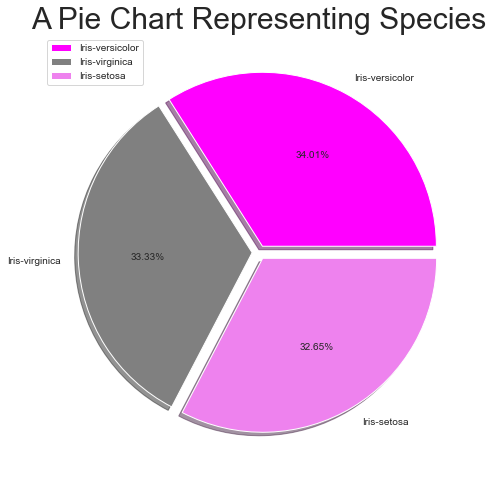

In [27]:
# plotting a pie chart
size = [50,49,48]
labels = "Iris-versicolor", "Iris-virginica","Iris-setosa"
colors = ['magenta', 'grey','violet']
explode = [0.04,0.04,0.04]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors,explode = explode,shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Species', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

## Visualization

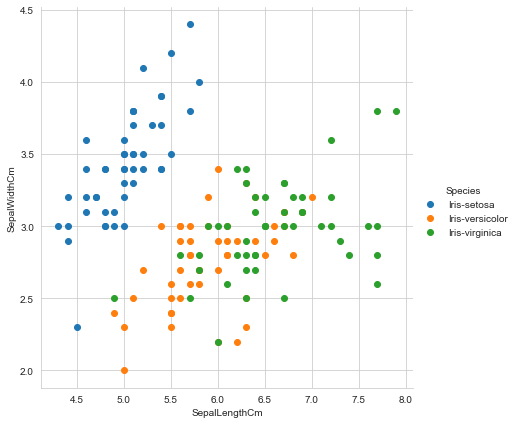

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

### Pairplot
pairwise relationships in a dataset.

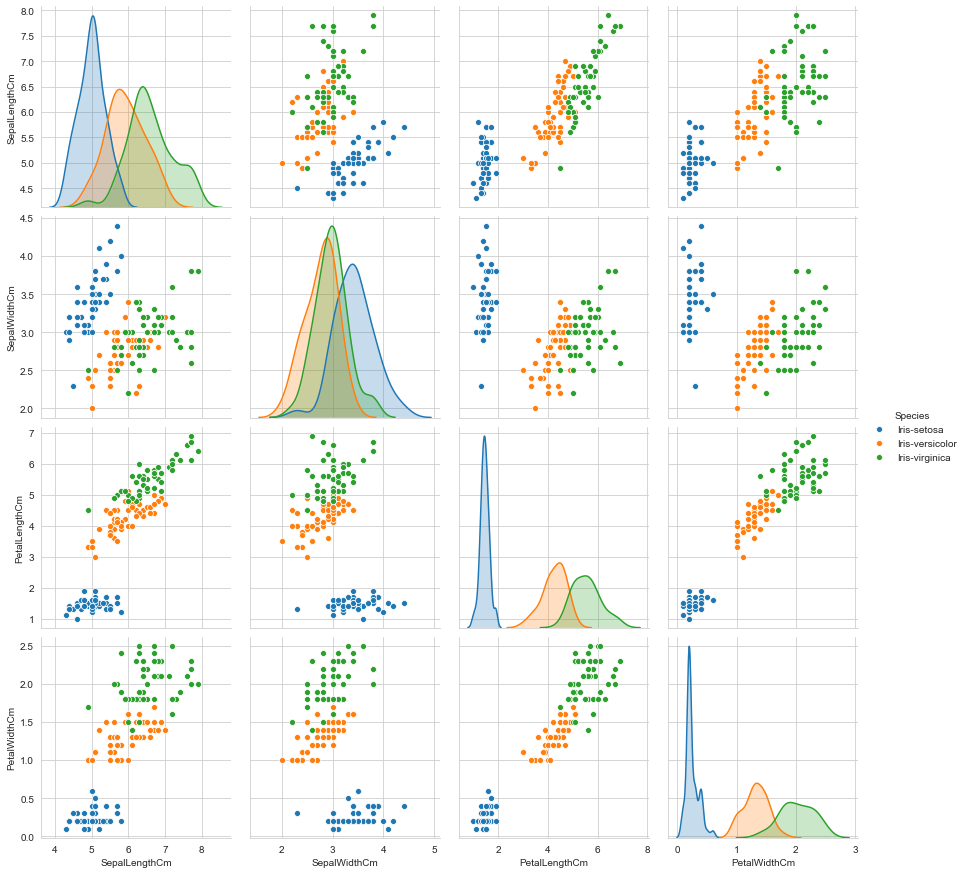

In [13]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", size=3);
plt.show()

### Histogram

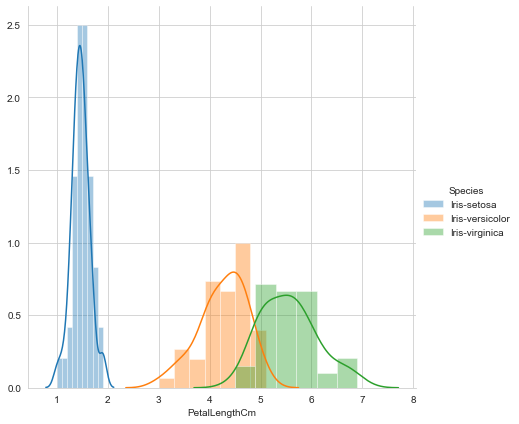

In [14]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend()
plt.show()

## Plots of CDF of PetalLength for various types of flowers.

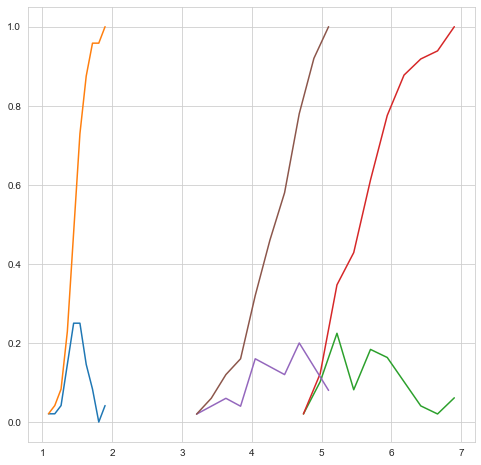

In [15]:
iris_setosa = df.loc[df["Species"] == "Iris-setosa"];
iris_virginica = df.loc[df["Species"] == "Iris-virginica"];
iris_versicolor = df.loc[df["Species"] == "Iris-versicolor"];

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

### Boxplot
box plot shows distribution of the features

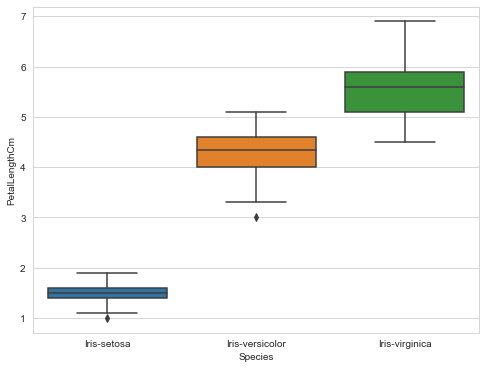

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.show()

### ViolinPlot

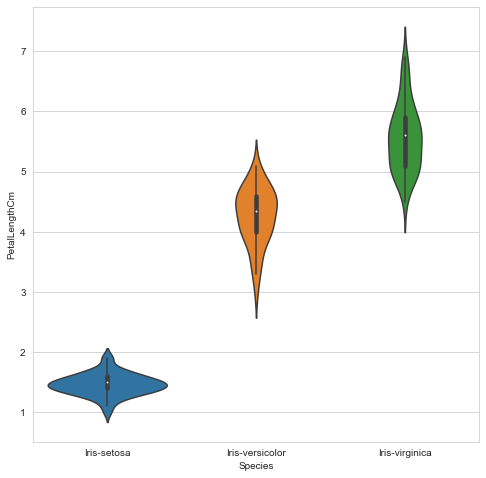

In [17]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=8)
plt.show()

### A correlation analysis will allow to identify relationships between the dataset variables

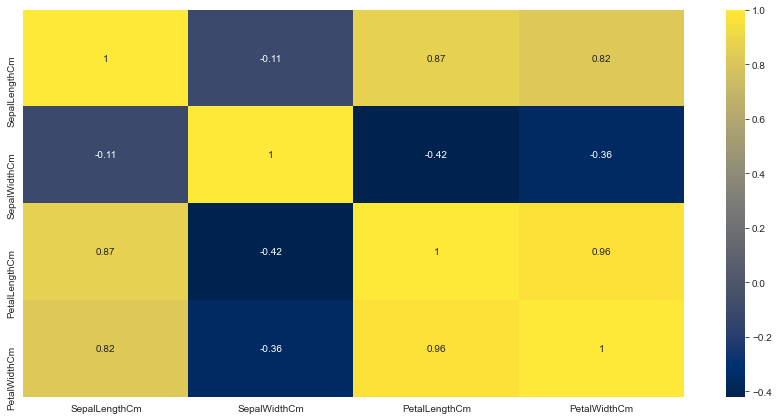

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='cividis')
plt.tight_layout()

In [19]:
x= df.drop('Species',axis=1)
y= df['Species']

## Model Traning

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train)

In [22]:
# features for plotting the decision tree graphs
features = x.columns.tolist()
target = y.value_counts().index

## Decision Tree Visualization

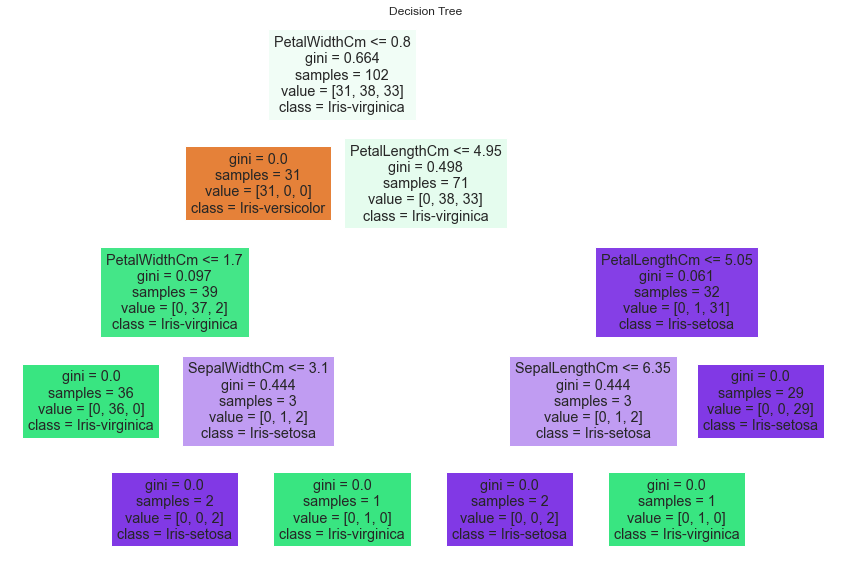

In [23]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,feature_names=features,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree")
plt.show()

# Thank You